# Expanded Image Analysis Lab

## Intro
Image segmentation can be useful for edge detection.  You saw how to segment images with k-Means awhile ago.  Now, expand upon that by thinking through the process with the eventual goal being able to perform edge detection on objects and detect their shape.  

The step you may want to take after that is image recognition, but we'll leave that for homework.

## Goals for lab
* Become comfortable building out a solution in notebooks with R and making it **reproducible**
* Gain/regain the experience of a "hackathon" style lab involving collaboration
* Become more comfortable and familiar with the notebook shortcuts and tools

## Instructions

Libraries needed: `jpeg` (could replace with `png`), `grid` and `gridExtra` (if not installed general installation of packages is outline in [01.Installing stuff](notebook_basics/01.Installing stuff.ipynb))

**PART 1.** Think through a general process of finding edges or borders in an image.  If it's helpful think of it in the context of these pictures:

<table>

<td><img width = 300 src = 'images/05_Expanded_Image_Analysis_Lab/hummingbird_mharris.jpg'></td>
<td><img width = 300 src = 'images/05_Expanded_Image_Analysis_Lab/a_query.jpg'></td>
<td><img width = 300 src = 'images/05_Expanded_Image_Analysis_Lab/whidbey_mharris.jpg'></td>

</table>

These pictures live in the following folders.  Don't worry, these personal photos are not copyrighted.  Their file names are (including folder) are:

* images/05_Expanded_Image_Analysis_Lab/hummingbird_mharris.jpg
* images/05_Expanded_Image_Analysis_Lab/a_query.jpg
* images/05_Expanded_Image_Analysis_Lab/whidbey_mharris.jpg

> Bonus points to those who also figure out how to rotate the middle image clockwise by 90 degrees.

Code example to follow taken from Ryan Walker wrote a marvelous blog [post](http://www.r-bloggers.com/color-quantization-in-r/) on color quantization and segmentation in R.

http://www.r-bloggers.com/color-quantization-in-r/

**PART 2.** Perform image processing task such as segmentation (we saw k-Means earlier)

```R
library(jpeg)
myimg <- readJPEG('images/05_Expanded_Image_Analysis_Lab/hummingbird_mharris.jpg')
# copy the image three times
myimg.R = myimg
myimg.G = myimg
myimg.B = myimg
# zero out the non-contributing channels for each image copy
myimg.R[,,2:3] = 0
myimg.G[,,1]=0
myimg.G[,,3]=0
myimg.B[,,1:2]=0

...
```

## Sample code (directly from Ryan Walker)

In [12]:
library(jpeg)
library("grid")
library("gridExtra")

myimg <- readJPEG('images/05_Expanded_Image_Analysis_Lab/hummingbird_mharris.jpg')


In [7]:
### EX 3: show the 3 channels in separate images
# copy the image three times
myimg.R = myimg
myimg.G = myimg
myimg.B = myimg

# zero out the non-contributing channels for each image copy
myimg.R[,,2:3] = 0
myimg.G[,,1]=0
myimg.G[,,3]=0
myimg.B[,,1:2]=0

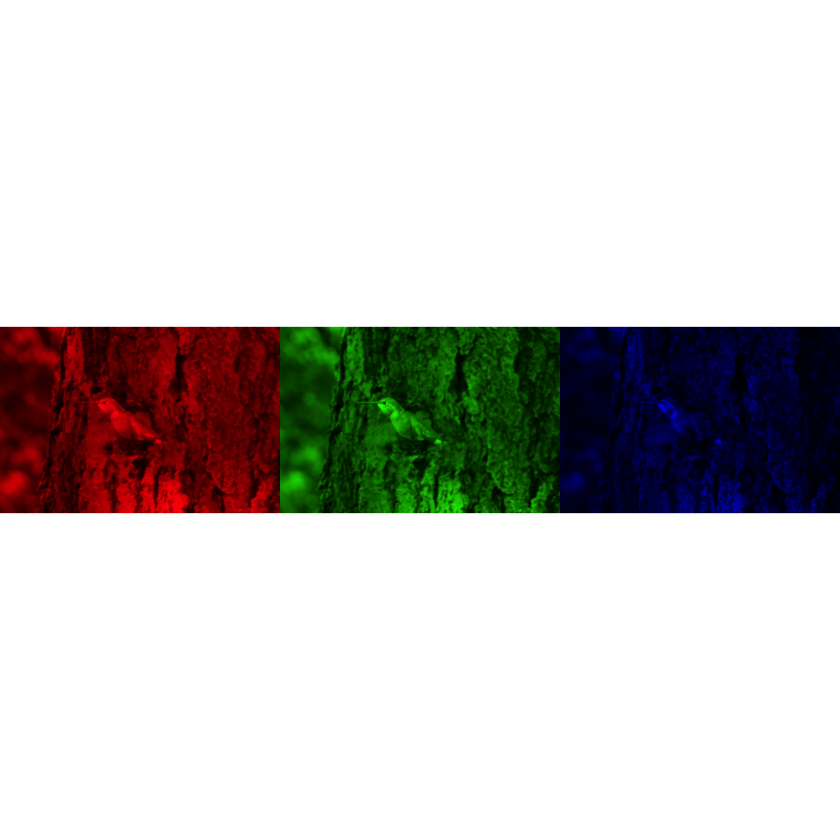

In [8]:
# build the image grid
img1 = rasterGrob(myimg.R)
img2 = rasterGrob(myimg.G)
img3 = rasterGrob(myimg.B)
grid.arrange(img1, img2, img3, nrow=1)

In [9]:
# Now let’s segment this image. First, we need to reshape the 
#  array into a data frame with one row for each pixel and three columns for the RGB channels:
# reshape image into a data frame
df = data.frame(
  red = matrix(myimg[,,1], ncol=1),
  green = matrix(myimg[,,2], ncol=1),
  blue = matrix(myimg[,,3], ncol=1)
)

In [10]:
# Now, we apply k-means to our data frame. We’ll choose k=4 to break the image into 4 color regions.

### compute the k-means clustering
K = kmeans(df,4)
df$label = K$cluster

### Replace the color of each pixel in the image with the mean 
### R,G, and B values of the cluster in which the pixel resides:

# get the coloring
colors = data.frame(
  label = 1:nrow(K$centers), 
  R = K$centers[,"red"],
  G = K$centers[,"green"],
  B = K$centers[,"blue"]
)

# merge color codes on to df
# IMPORTANT: we must maintain the original order of the df after the merge!
df$order = 1:nrow(df)
df = merge(df, colors)
df = df[order(df$order),]
df$order = NULL

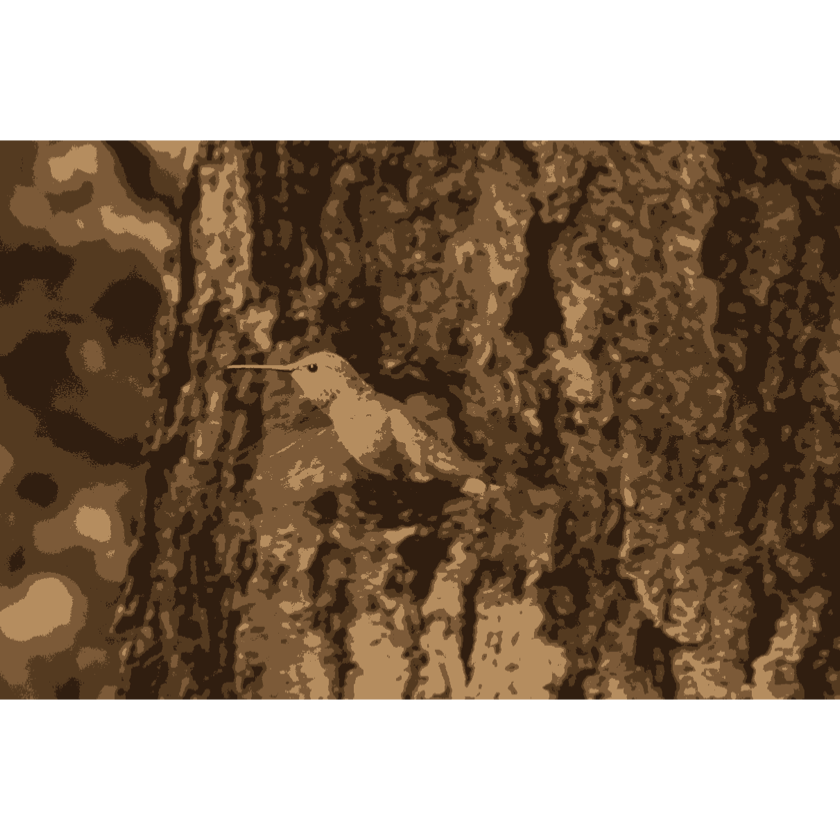

In [11]:
# Finally, we have to reshape our data frame back into an image:

# get mean color channel values for each row of the df.
R = matrix(df$R, nrow=dim(myimg)[1])
G = matrix(df$G, nrow=dim(myimg)[1])
B = matrix(df$B, nrow=dim(myimg)[1])
  
# reconstitute the segmented image in the same shape as the input image
myimg.segmented = array(dim=dim(myimg))
myimg.segmented[,,1] = R
myimg.segmented[,,2] = G
myimg.segmented[,,3] = B

# View the result
grid.raster(myimg.segmented)

Create a new notebook with the emphasis on a document for reproducible research.

## Image processing and/or analysis packages to check out now or later
1. imager 
2. EBImage from bioc 
3. ripa 
4. adimpro

## Remember your machine learning options from  CRAN
* https://cran.r-project.org/web/views/MachineLearning.html

## If you happen to choose NNs..
* Here's info on how to visualize them (and implement with a few different packages) https://beckmw.wordpress.com/tag/nnet/


## Remember To Save Often (and to take "home" or share, download it)